## SVM

### 1. SVM 개념이해

In [1]:
# import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_classification

from sklearn.svm import SVC

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

#### 기본 svm모델 생성

In [2]:
# svm모델을 시각화하는 함수
def svm_visualize(x, y, model, title = "") :

    xx, yy = np.meshgrid(np.linspace(x[:,0].min(), x[:,0].max(), 50), 
                         np.linspace(x[:,1].min(), x[:,1].max(), 50)) # mesh grid

    # 메쉬 그리드값에 대해 모델 부터 거리 값 만들기.
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 그래프 그리기
    plt.figure(figsize=(6, 6))
    # 데이터 산점도
    sns.scatterplot(x=x[:,0], y=x[:,1], hue=y)
    # levels= 0 모델 ,  -1, 1 은 마진 경계
    plt.contour(xx, yy, Z, levels=[-1, 0, 1], colors = 'gray',linestyles  = ['--','-','--'])
    plt.title(title)
    plt.axis("tight")
    plt.show()

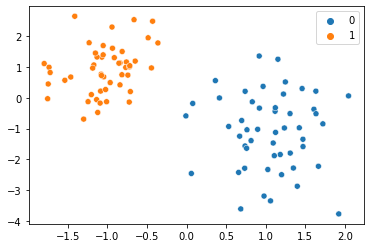

In [3]:
# sample data 생성
seed = 8

x, y = make_classification(n_samples=100,
                        n_features=2, # class 종류
                        n_redundant=0, 
                        weights = [0.5, 0.5],  # class 0과 1의 비율 조정 ==> class imbalance 상황만들기
                        n_clusters_per_class=1, 
                        random_state=seed)
sns.scatterplot(x[:,0], x[:,1], hue = y)
plt.show()

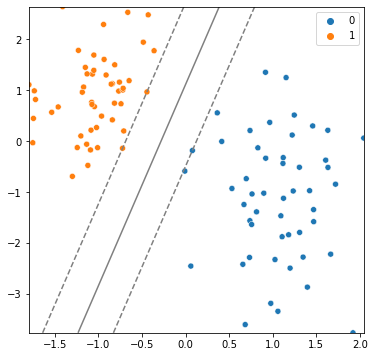

In [4]:
# svm 모델 생성 및 시각화
model = SVC(kernel = 'linear', C = 10)
model.fit(x,y)
svm_visualize(x, y, model)

#### 결정 경계와 마진

In [5]:
# 결정 경계와 마진
seed = 34
x, y = make_classification(n_features=2, n_redundant=0, weights = [0.5, 0.5],
                           n_clusters_per_class=1, random_state=seed)

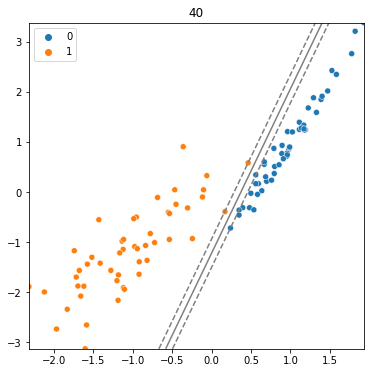

In [6]:
cost = 40
model = SVC(kernel = 'linear', C = cost)
model.fit(x,y)
svm_visualize(x, y, model, cost)

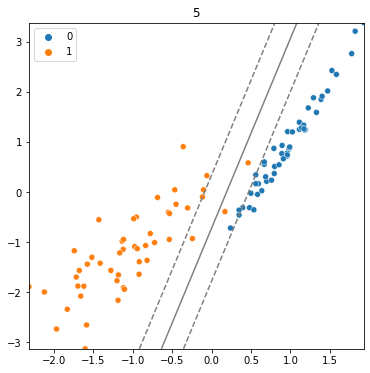

In [7]:
cost = 5
model = SVC(kernel = 'linear', C = cost)
model.fit(x,y)
svm_visualize(x, y, model, cost)

#### 커널 트릭 사용

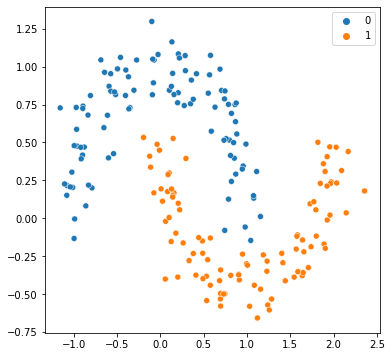

In [8]:
# 선형 경계로 분류할 수 없는 데이터
x, y = make_moons(n_samples = 200, noise = .13, random_state = 10)

plt.figure(figsize = (6,6))
sns.scatterplot(x[:,0], x[:,1], hue = y)
plt.show()

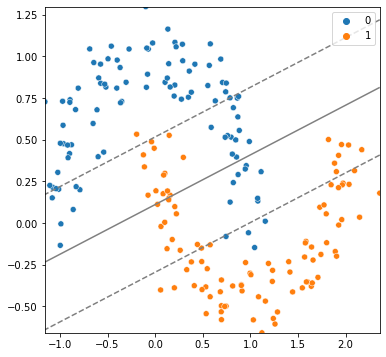

In [9]:
model = SVC(kernel = 'linear')
model.fit(x,y)
svm_visualize(x, y, model)

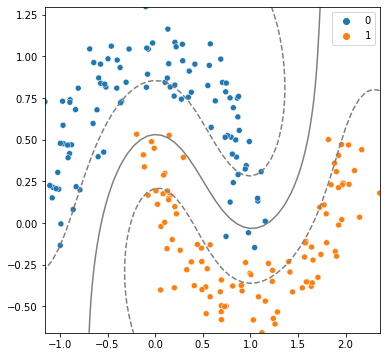

In [10]:
# 커널 트릭 사용 : rbf
model = SVC(kernel = 'rbf', C = 1)
model.fit(x,y)
svm_visualize(x, y, model)

#### 하이퍼 파라미터
- Cost
    - 오류를 허용하지 않으려는 비용
    - 값이 클수록 오류를 허용하지 않기 위한 경계를 만듦

- gamma
    - 결정경계의 곡률
    - 값이 클수록 곡률반경이 작아짐

#### Cost에 따른 결정 경계 변화

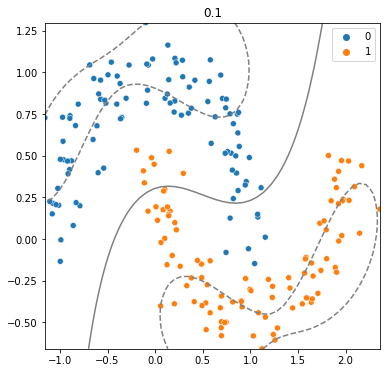

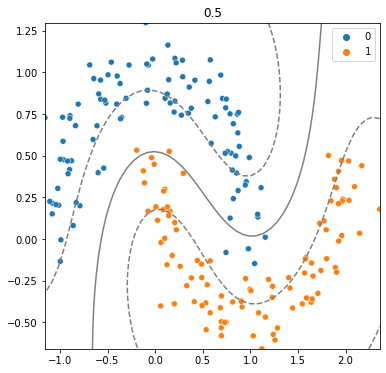

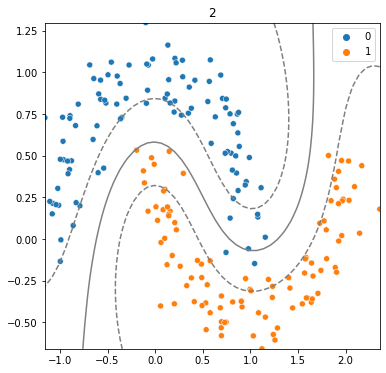

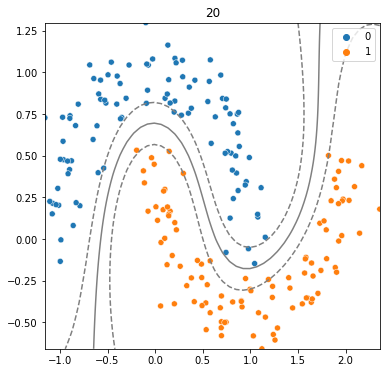

In [11]:
for cost in [0.1, .5, 2, 20] : 
    model = SVC(kernel = 'rbf', C = cost)
    model.fit(x,y)
    svm_visualize(x, y, model, cost)

### 2. 데이터 준비

* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (Target 변수)

In [12]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data = data.sample(5000, random_state=2022)

In [13]:
# id 제거
drop_cols = ['id']
data.drop(drop_cols, axis=1, inplace=True)

In [14]:
# x, y 나누기
target = 'CHURN'
x = data.drop(target, axis=1)
y = data.loc[:, target]

In [15]:
# NA 조치
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 3178 to 3698
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   COLLEGE                      5000 non-null   int64 
 1   INCOME                       5000 non-null   int64 
 2   OVERAGE                      5000 non-null   int64 
 3   LEFTOVER                     5000 non-null   int64 
 4   HOUSE                        5000 non-null   int64 
 5   HANDSET_PRICE                5000 non-null   int64 
 6   OVER_15MINS_CALLS_PER_MONTH  5000 non-null   int64 
 7   AVERAGE_CALL_DURATION        5000 non-null   int64 
 8   REPORTED_SATISFACTION        5000 non-null   object
 9   REPORTED_USAGE_LEVEL         5000 non-null   object
 10  CONSIDERING_CHANGE_OF_PLAN   5000 non-null   object
 11  CHURN                        5000 non-null   object
dtypes: int64(8), object(4)
memory usage: 507.8+ KB


In [16]:
# 가변수화
cat_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = cat_cols, drop_first = True)

In [17]:
# train, valid 나누기
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3, random_state = 2022)

In [18]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

In [19]:
x_train.shape

(3500, 20)

### 3. 모델링

In [20]:
# import
from sklearn.svm import SVC

from sklearn.metrics import *

In [21]:
# 선언
model = SVC() # default를 rbf 커널

In [22]:
# 학습
model.fit(x_train, y_train)

SVC()

In [23]:
# 예측
pred = model.predict(x_val)

In [24]:
# 평가
confusion_matrix(y_val, pred)

array([[436, 295],
       [204, 565]], dtype=int64)

In [25]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

       LEAVE       0.68      0.60      0.64       731
        STAY       0.66      0.73      0.69       769

    accuracy                           0.67      1500
   macro avg       0.67      0.67      0.66      1500
weighted avg       0.67      0.67      0.67      1500



### 4. C와 gamma를 조절

####  C를 조절

In [26]:
model1 = SVC(C = 1)
model1.fit(x_train, y_train)
pred1 = model1.predict(x_val)
print(confusion_matrix(y_val, pred1))
print(classification_report(y_val, pred1))

[[436 295]
 [204 565]]
              precision    recall  f1-score   support

       LEAVE       0.68      0.60      0.64       731
        STAY       0.66      0.73      0.69       769

    accuracy                           0.67      1500
   macro avg       0.67      0.67      0.66      1500
weighted avg       0.67      0.67      0.67      1500



In [27]:
model2 = SVC(C = 5)
model2.fit(x_train, y_train)
pred2 = model2.predict(x_val)
print(confusion_matrix(y_val, pred2))
print(classification_report(y_val, pred2))

[[440 291]
 [252 517]]
              precision    recall  f1-score   support

       LEAVE       0.64      0.60      0.62       731
        STAY       0.64      0.67      0.66       769

    accuracy                           0.64      1500
   macro avg       0.64      0.64      0.64      1500
weighted avg       0.64      0.64      0.64      1500



In [28]:
model3 = SVC(C = 10)
model3.fit(x_train, y_train)
pred3 = model3.predict(x_val)
print(confusion_matrix(y_val, pred3))
print(classification_report(y_val, pred3))

[[433 298]
 [250 519]]
              precision    recall  f1-score   support

       LEAVE       0.63      0.59      0.61       731
        STAY       0.64      0.67      0.65       769

    accuracy                           0.63      1500
   macro avg       0.63      0.63      0.63      1500
weighted avg       0.63      0.63      0.63      1500



#### gamma를 조절

In [29]:
model4 = SVC(gamma = 1)
model4.fit(x_train, y_train)
pred4 = model4.predict(x_val)
print(confusion_matrix(y_val, pred4))
print(classification_report(y_val, pred4))

[[433 298]
 [256 513]]
              precision    recall  f1-score   support

       LEAVE       0.63      0.59      0.61       731
        STAY       0.63      0.67      0.65       769

    accuracy                           0.63      1500
   macro avg       0.63      0.63      0.63      1500
weighted avg       0.63      0.63      0.63      1500



In [30]:
model5 = SVC(gamma = 5)
model5.fit(x_train, y_train)
pred5 = model5.predict(x_val)
print(confusion_matrix(y_val, pred5))
print(classification_report(y_val, pred5))

[[431 300]
 [334 435]]
              precision    recall  f1-score   support

       LEAVE       0.56      0.59      0.58       731
        STAY       0.59      0.57      0.58       769

    accuracy                           0.58      1500
   macro avg       0.58      0.58      0.58      1500
weighted avg       0.58      0.58      0.58      1500



In [31]:
model6 = SVC(gamma = 10)
model6.fit(x_train, y_train)
pred6 = model6.predict(x_val)
print(confusion_matrix(y_val, pred6))
print(classification_report(y_val, pred6))

[[351 380]
 [264 505]]
              precision    recall  f1-score   support

       LEAVE       0.57      0.48      0.52       731
        STAY       0.57      0.66      0.61       769

    accuracy                           0.57      1500
   macro avg       0.57      0.57      0.57      1500
weighted avg       0.57      0.57      0.57      1500



#### C와 gamma를 동시에 조절

In [32]:
model7 = SVC(C = 1, gamma = 1)
model7.fit(x_train, y_train)
pred7 = model7.predict(x_val)
print(confusion_matrix(y_val, pred7))
print(classification_report(y_val, pred7))

[[433 298]
 [256 513]]
              precision    recall  f1-score   support

       LEAVE       0.63      0.59      0.61       731
        STAY       0.63      0.67      0.65       769

    accuracy                           0.63      1500
   macro avg       0.63      0.63      0.63      1500
weighted avg       0.63      0.63      0.63      1500

